<br>
<br>

# SECOND PART OF THE PROJECT

<br>

# Before modelling - analyze missing values in *test* dataset

We have to analyze the test dataset separately since we didn't do that in exploratory analysis. We will follow the same logic.

In [1]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import powerlaw
import scipy
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
count_of_null_values = df_test.isna().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data2 = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data2.head(34)

,Count of null-values occurrences,Percentage of null-values occurrences
PoolQC,1456,99.79%
MiscFeature,1408,96.50%
Alley,1352,92.67%
Fence,1169,80.12%
FireplaceQu,730,50.03%
LotFrontage,227,15.56%
GarageCond,78,5.35%
GarageQual,78,5.35%
GarageYrBlt,78,5.35%
GarageFinish,78,5.35%


In [4]:
df_test_x = df_test.copy()

##### <font color='blue'> PoolQC </font> <a id="poolqc">

In [5]:
# Number of rows which have null(NA) values in column 'PoolQC'
number_of_nulls = df_test[df_test['PoolQC'].isna()].shape[0]

# Number of rows which have zeros in column 'PoolArea'
number_of_zeros = df_test[df_test['PoolArea'] == 0].shape[0]

# Number of rows which have both 'NA' in 'PoolQC' and 0 in 'PoolArea'
zeros_and_nulls = df_test[(df_test['PoolQC'].isna()) & (df_test['PoolArea'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'PoolQC': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'PoolArea': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'PoolQC': 1456
Number of rows containing 0 in column 'PoolArea': 1453

Number of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': 1453


For those 1453 rows that contain both 0 for PoolArea and NaN for PoolQC, we will fill their null values with "NoPool".
There are other 3 rows with null values that have PoolArea > 0. Since we have only 3 rows with non-null PoolQC, we can't decide anything about relationship between PoolArea and PoolQC. But we notice that PoolArea for our 3 rows are big in comparison to those 3 existing pools, and other features don't stand out, so we will fill PoolQC with "Ex".

In [6]:
df_test_x.loc[(df_test_x['Id'] == 2421) | (df_test_x['Id'] == 2504) | (df_test_x['Id'] == 2600), 'PoolQC'] = 'Ex'
df_test_x['PoolQC'].fillna('NoPool', inplace=True)

##### <font color='blue'> MiscFeature </font> <a id="miscfeature">

In [7]:
# Number of rows which have null(NA) values in column 'MiscFeature'
number_of_nulls = df_test_x[df_test_x['MiscFeature'].isna()].shape[0]

# Number of rows which have zeros in column 'MiscVal'
number_of_zeros = df_test_x[df_test_x['MiscVal'] == 0].shape[0]

# Number of rows which have both 'NA' in 'MiscFeature' and 0 in 'MiscVal'
zeros_and_nulls = df_test_x[(df_test_x['MiscFeature'].isna()) & (df_test_x['MiscVal'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'MiscFeatures': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'MiscVal': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'MiscFeatures': 1408
Number of rows containing 0 in column 'MiscVal': 1408

Number of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': 1407


Those 1407 null values will be filled with "NoMiscFeature". For one row with MiscVal = 0 and MiscFeature = Shed, we will fill MiscFeature with average value of MiscFeature = "Shed". For one row with MiscFeature = NaN and MiscVal > 0, we can't conclude anything. It has very high value for MiscVal compared to others. We will drop this row. 

In [8]:
# Drop one row
df_test_x.drop(df_test_x[df_test_x['Id'] == 2550].index, inplace=True)

# Fill in average value of MiscVal where MiscFeature = Shed
means = df_test_x.groupby('MiscFeature')['MiscVal'].mean()
df_test_x.loc[(df_test_x['Id'] == 2432), 'MiscVal'] = means['Shed']

# Fill NaNs with "NoMiscFeature"
df_test_x['MiscFeature'].fillna('NoMiscFeature', inplace=True)

#####  <font color='blue'> Alley </font> <a id="alley">

Explanation as for train dataset. 

In [9]:
df_test_x['Alley'].fillna('NoAlley', inplace=True)

##### <font color='blue'> Fence </font> <a id="fence">

Explanation as for train dataset.

In [10]:
df_test_x['Fence'].fillna('NoFence', inplace=True)

##### <font color='blue'> FireplaceQu </font> <a id="fireplacequ">

In [11]:
# Number of rows which have null(NA) values in column 'FireplaceQu'
number_of_nulls = df_test_x[df_test_x['FireplaceQu'].isna()].shape[0]

# Number of rows which have zeros in column 'Fireplaces'
number_of_zeros = df_test_x[df_test_x['Fireplaces'] == 0].shape[0]

# Number of rows which have both 'NA' in 'FireplaceQu' and 0 in 'Fireplaces'
zeros_and_nulls = df_test_x[(df_test_x['FireplaceQu'].isna()) & (df_test_x['Fireplaces'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'FireplaceQu': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'Fireplaces': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'FireplaceQu': 730
Number of rows containing 0 in column 'Fireplaces': 730

Number of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': 730


Explanation as for train dataset.

In [12]:
df_test_x['FireplaceQu'].fillna('NoFireplace', inplace=True)

##### <font color='blue'> LotFrontage </font> <a id="lotfrontage">

In [13]:
# Number of rows with 0 in column 'LotFrontage'
zeros = df_test_x[df_test_x['LotFrontage'] == 0].shape[0]
print("Number of rows that contain 0 in column 'LotFrontage': {}" .format(zeros))

Number of rows that contain 0 in column 'LotFrontage': 0


Explanation as for train dataset.

In [14]:
# Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
df_test_x['LotFrontage'] = df_test_x.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

##### <font color='blue'> GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt, GarageArea, GarageCars </font> <a id="garagex">

In [15]:
# Just a condition that we will use in the next line, it checks the null values of those 5 specific columns
all_nulls_condition = (df_test_x['GarageCond'].isna()) & (df_test_x['GarageType'].isna()) & (df_test_x['GarageFinish'].isna()) & (df_test_x['GarageQual'].isna()) & (df_test_x['GarageYrBlt'].isna())

# Just a condition that we will use in the next line, it checks the zeros in those 2 specific columns
all_zeros_condition = (df_test_x['GarageCars'] == 0) & (df_test_x['GarageArea'] == 0)

# Number of rows which have both 'NA' in 5 variables and 0 in 2 variables
zeros_and_nulls = df_test_x[all_nulls_condition & all_zeros_condition].shape[0]

print("\nNumber of rows which have all zeros and nulls in all 7 variables: {}" .format(zeros_and_nulls))


Number of rows which have all zeros and nulls in all 7 variables: 76


Those 76 rows will be filled with "NoGarage". Other two rows where some features have null values, and some don't, will be treated as "NoGarage" rows.

In [16]:
df_test_x['GarageCond'].fillna('NoGarage', inplace=True)
df_test_x['GarageType'].fillna('NoGarage', inplace=True)
df_test_x['GarageQual'].fillna('NoGarage', inplace=True)
df_test_x['GarageFinish'].fillna('NoGarage', inplace=True)
df_test_x['GarageYrBlt'].fillna(0, inplace=True)

# Two specific rows
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageType'] = 'NoGarage'
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageCars'] = 0
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageArea'] = 0

##### <font color='blue'> BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, <br> BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF </font> <a id="bsmtx">

In [17]:
# Number of rows which have null(NA) values in those 5 specific columns (separately)
number_of_nulls1 = df_test_x[df_test_x['BsmtExposure'].isna()].shape[0]
number_of_nulls2 = df_test_x[df_test_x['BsmtFinType2'].isna()].shape[0]
number_of_nulls3 = df_test_x[df_test_x['BsmtFinType1'].isna()].shape[0]
number_of_nulls4 = df_test_x[df_test_x['BsmtCond'].isna()].shape[0]
number_of_nulls5 = df_test_x[df_test_x['BsmtQual'].isna()].shape[0]

print("Number of rows containing 'NA' in column 'BsmtExposure': {}" .format(number_of_nulls1))
print("Number of rows containing 'NA' in column 'BsmtFinType2': {}" .format(number_of_nulls2))
print("Number of rows containing 'NA' in column 'BsmtFinType1': {}" .format(number_of_nulls3))
print("Number of rows containing 'NA' in column 'BsmtCond': {}" .format(number_of_nulls4))
print("Number of rows containing 'NA' in column 'BsmtQual': {}" .format(number_of_nulls5))


# Number of zeros in TotalBsmtSF
number_of_zeros4 = df_test_x[df_test_x['TotalBsmtSF'] == 0].shape[0]
zero_condition = (df_test_x['TotalBsmtSF'] == 0)

print("\nNumber of rows containing 0 in column 'TotalBsmtSF': {}" .format(number_of_zeros4))


# Number of rows which have both 'NA' in 5 variables and 0 in 6 variables
zeros_and_nulls = df_test_x[all_nulls_condition & zero_condition].shape[0]

print("\nNumber of rows which have zeros for TotalBsmtSF and nulls in those 5 variables: {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'BsmtExposure': 44
Number of rows containing 'NA' in column 'BsmtFinType2': 42
Number of rows containing 'NA' in column 'BsmtFinType1': 42
Number of rows containing 'NA' in column 'BsmtCond': 45
Number of rows containing 'NA' in column 'BsmtQual': 44

Number of rows containing 0 in column 'TotalBsmtSF': 41

Number of rows which have zeros for TotalBsmtSF and nulls in those 5 variables: 7


Those 41 row from above will be treated as "NoBsmt". Let's see what to do with those few remaining null values.

In [18]:
df_test_x[['Id', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']][((df_test_x['BsmtExposure'].isna()) | (df_test_x['BsmtFinType2'].isna()) | (df_test_x['BsmtFinType1'].isna()) | (df_test_x['BsmtCond'].isna()) | (df_test_x['BsmtQual'].isna())) & (df_test_x['TotalBsmtSF'] > 0)]

,Id,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
27,1488,NaN,Unf,Unf,TA,Gd,0.0,0.0,0.0,0.0,1595.0,1595.0
580,2041,Mn,Rec,GLQ,NaN,Gd,0.0,1.0,382.0,1044.0,0.0,1426.0
725,2186,No,Unf,BLQ,NaN,TA,1.0,0.0,0.0,1033.0,94.0,1127.0
757,2218,No,Unf,Unf,Fa,NaN,0.0,0.0,0.0,0.0,173.0,173.0
758,2219,No,Unf,Unf,TA,NaN,0.0,0.0,0.0,0.0,356.0,356.0
888,2349,NaN,Unf,Unf,TA,Gd,0.0,0.0,0.0,0.0,725.0,725.0
1064,2525,Av,Unf,ALQ,NaN,TA,0.0,0.0,0.0,755.0,240.0,995.0


Id = 1488: Since basement is unfinished, probably BsmtExposure is not built (yet or ever will be). So we will fil "No". <br>
Id = 2041: Based on other Bsmt values, we expect basement is in good overall condition. <br>
Id = 2186: Based on other Bsmt values, we expect basement is in typical overall condition. <br>
Id = 2218: Based on other Bsmt values, we expect basement has fair BsmtQual. Features say it is a small place with fair condition, so probably cramped. <br>
Id = 2219: Based on other Bsmt values, we expect basement has typical BsmtQual. <br>
Id = 2349: Since basement is unfinished, probably BsmtExposure is not built (yet or ever will be). So we will fil "No". <br>
Id = 2525: Based on other Bsmt values, we expect basement is in good overall condition.

In [19]:
# Fix these few specific rows
df_test_x.loc[(df_test_x['Id'] == 1488) | (df_test_x['Id'] == 2349), 'BsmtExposure'] = 'No'
df_test_x.loc[(df_test_x['Id'] == 2041) | (df_test_x['Id'] == 2525), 'BsmtCond'] = 'Gd'
df_test_x.loc[(df_test_x['Id'] == 2186), 'BsmtCond'] = 'TA'
df_test_x.loc[(df_test_x['Id'] == 2218), 'BsmtQual'] = 'Fa'
df_test_x.loc[(df_test_x['Id'] == 2219), 'BsmtQual'] = 'TA'

# Fill new values for the rest of the *NA* values
df_test_x['BsmtExposure'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtFinType2'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtFinType1'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtCond'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtQual'].fillna('NoBsmt', inplace=True)

In [20]:
df_test_x[['Id', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']][((df_test_x['BsmtHalfBath'].isna()) | (df_test_x['BsmtFullBath'].isna()) | (df_test_x['BsmtFinSF2'].isna()) | (df_test_x['BsmtFinSF1'].isna()) | (df_test_x['TotalBsmtSF'].isna()) | (df_test_x['BsmtUnfSF'].isna()))]

,Id,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
660,2121,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NaN,NaN,NaN,NaN,NaN
728,2189,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NaN,0.0,0.0,0.0,0.0


We will fill missing values with zeros.

In [21]:
df_test_x['BsmtHalfBath'].fillna(0, inplace=True)
df_test_x['BsmtFullBath'].fillna(0, inplace=True)
df_test_x['BsmtFinSF2'].fillna(0, inplace=True)
df_test_x['BsmtFinSF1'].fillna(0, inplace=True)
df_test_x['BsmtUnfSF'].fillna(0, inplace=True)
df_test_x['TotalBsmtSF'].fillna(0, inplace=True)

##### <font color='blue'> MasVnrArea, MasVnrType </font> <a id="masvnrx">

In [22]:
# Number of rows that contain 'NA' for both columns 'MasVnrArea' and 'MasVnrType'
nulls = df_test_x[(df_test_x['MasVnrArea'].isna()) & (df_test_x['MasVnrType'].isna())].shape[0]

print("Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': {}" .format(nulls))

Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': 15


In [23]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['MasVnrArea'].notnull()) & (df_test_x['MasVnrType'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1150,2611,20,RL,124.0,27697,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NoFireplace,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,11,2007,COD,Abnorml


Since everything is typical about this house, we will fill missing MasVnrType with most often MasVnrType.

In [24]:
df_test_x['MasVnrType'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MasVnrType
0,None,878
1,BrkFace,434
2,Stone,120
3,BrkCmn,10


In [25]:
df_test_x.loc[(df_test_x['Id'] == 2611), 'MasVnrType'] = 'BrkFace'

# Filling with zeros and 'None'
df_test_x['MasVnrArea'].fillna(0, inplace=True)
df_test_x['MasVnrType'].fillna('None', inplace=True)

##### <font color='blue'> MSZoning </font> <a id="electrical">

Since MSZoning is location based feature, we will find most often values for MSZoning in belonging neighborhood.

In [26]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['MSZoning'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,NoAlley,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NoFireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NoFireplace,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,5,2006,WD,Normal


In [27]:
df_test_x['MSZoning'][df_test_x['Neighborhood'] == 'IDOTRR'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MSZoning
0,RM,40
1,C (all),13


In [28]:
df_test_x['MSZoning'][df_test_x['Neighborhood'] == 'Mitchel'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MSZoning
0,RL,60
1,RM,4


In [29]:
df_test_x.loc[(df_test_x['Id'] == 2905), 'MSZoning'] = 'RL'

# Filling all the other missing values with 'RM'
df_test_x['MSZoning'].fillna('RM', inplace=True)

##### <font color='blue'> Utilities </font> <a id="electrical">

In [30]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Utilities'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RM,109.0,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,3,2009,ConLD,Normal
485,1946,20,RL,63.0,31220,Pave,NoAlley,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NoPool,NoFence,Shed,750.0,5,2008,WD,Normal


In [31]:
df_test_x['Utilities'][(df_test_x['Neighborhood'] == 'Gilbert') | (df_test_x['Neighborhood'] == 'IDOTRR')].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Utilities
0,AllPub,140


In [32]:
df_test_x['Utilities'].fillna('AllPub', inplace=True)

##### <font color='blue'> Functional </font> <a id="electrical">

In [33]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Functional'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,RM,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NoFireplace,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NoPool,NoFence,NoMiscFeature,0.0,9,2007,COD,Abnorml


In [34]:
df_test_x['Functional'][(df_test_x['Neighborhood'] == 'IDOTRR') & (df_test_x['OverallQual'] < 5) & (df_test_x['OverallCond'] < 6)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Functional
0,Typ,6
1,Min1,2
2,Maj2,1
3,Mod,1


In [35]:
df_test_x['Functional'].fillna('Typ', inplace=True)

##### <font color='blue'> SaleType </font> <a id="electrical">

In [36]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['SaleType'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,10,2007,NaN,Normal


In [37]:
df_test_x['SaleType'][(df_test_x['SaleCondition'] == 'Normal') & (df_test_x['Neighborhood'] == 'Sawyer') & (df_test_x['OverallQual'] >= 5) & (df_test_x['OverallCond'] >= 6)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,SaleType
0,WD,27
1,COD,1


In [38]:
df_test_x['SaleType'].fillna('WD', inplace=True)

##### <font color='blue'> Exterior1st, Exterior2nd </font> <a id="electrical">

In [39]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Exterior1st'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NoGarage,0.0,NoGarage,0.0,0.0,NoGarage,NoGarage,Y,0,39,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2008,WD,Normal


In [40]:
df_test_x['Exterior1st'][(df_test_x['YearBuilt'] > 1930) & (df_test_x['YearBuilt'] < 1950) & (df_test_x['YearRemodAdd'] > 2000) & (df_test_x['MasVnrType'] == 'None') & (df_test_x['Neighborhood'] == 'Edwards') & (df_test_x['OverallQual'] > 2) & (df_test_x['OverallCond'] > 4)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Exterior1st
0,Wd Sdng,2
1,VinylSd,1


In [41]:
df_test_x['Exterior2nd'][(df_test_x['YearBuilt'] > 1930) & (df_test_x['YearBuilt'] < 1950) & (df_test_x['YearRemodAdd'] > 2000) & (df_test_x['MasVnrType'] == 'None') & (df_test_x['Neighborhood'] == 'Edwards') & (df_test_x['OverallQual'] > 2) & (df_test_x['OverallCond'] > 4)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Exterior2nd
0,Wd Sdng,2
1,VinylSd,1


In [42]:
df_test_x['Exterior1st'].fillna('Wd Sdng', inplace=True)
df_test_x['Exterior2nd'].fillna('Wd Sdng', inplace=True)

##### <font color='blue'> KitchenQual </font> <a id="electrical">

In [43]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['KitchenQual'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NoFireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2010,COD,Normal


In [44]:
df_test_x['KitchenQual'][(df_test_x['Neighborhood'] == 'ClearCr') & (df_test_x['OverallQual'] > 4) & (df_test_x['OverallCond'] > 2)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,KitchenQual
0,TA,10
1,Gd,5


In [45]:
df_test_x['KitchenQual'].fillna('TA', inplace=True)

In [46]:
count_of_null_values = df_test_x.isna().sum().sort_values(ascending=False)
percent = (df_test_x.isnull().sum()/df_test_x.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data2 = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data2.head(1)

,Count of null-values occurrences,Percentage of null-values occurrences
SaleCondition,0,0.00%


<br>

# Modelling

In [47]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import powerlaw
import scipy
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

<HR>
    
## Fixing missing values, fixing wrong types, removing outliers
    
Let's implement important conclusions from exploratory analysis.

- Solving missing values from [2.2.2 Solving null values by variables](#solving-nulls-by-variables):

In [49]:
# Only for train dataset!
def fixMissingValuesTrain(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    dataset['PoolQC'].fillna('NoPool', inplace=True)
    dataset['MiscFeature'].fillna('NoMiscFeature', inplace=True)
    dataset['Alley'].fillna('NoAlley', inplace=True)
    dataset['Fence'].fillna('NoFence', inplace=True)
    dataset['FireplaceQu'].fillna('NoFireplace', inplace=True)

    # Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
    dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # GarageX features
    dataset['GarageCond'].fillna('NoGarage', inplace=True)
    dataset['GarageType'].fillna('NoGarage', inplace=True)
    dataset['GarageQual'].fillna('NoGarage', inplace=True)
    dataset['GarageFinish'].fillna('NoGarage', inplace=True)
    dataset['GarageYrBlt'].fillna(0, inplace=True)

    # BasementX features: Delete two rows from dataFrame
    dataset.drop(dataset[dataset['Id'] == 333].index, inplace=True)
    dataset.drop(dataset[dataset['Id'] == 949].index, inplace=True)

    # BasementX features: Fill new values for the rest of the *NA* values
    dataset['BsmtExposure'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    dataset['BsmtCond'].fillna('NoBsmt', inplace=True)
    dataset['BsmtQual'].fillna('NoBsmt', inplace=True)

    # MasVnrX features: Filling with zeros and 'None'
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['MasVnrType'].fillna('None', inplace=True)

    # Electrical feature: Fill the 'NA' value with 'SBrkr'
    dataset['Electrical'].fillna('SBrkr', inplace=True)

    return dataset

In [50]:
# Only for test dataset!
def fixMissingValuesTest(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # PoolQC
    dataset.loc[(dataset['Id'] == 2421) | (dataset['Id'] == 2504) | (dataset['Id'] == 2600), 'PoolQC'] = 'Ex'
    dataset['PoolQC'].fillna('NoPool', inplace=True)

    # MiscVal, MiscFeature
    #dataset.drop(dataset[dataset['Id'] == 2550].index, inplace=True)
    means = dataset.groupby('MiscFeature')['MiscVal'].mean()
    dataset.loc[(dataset['Id'] == 2432), 'MiscVal'] = means['Shed']
    dataset.loc[(dataset['Id'] == 2550), 'MiscFeature'] = 'Gar2'
    dataset['MiscFeature'].fillna('NoMiscFeature', inplace=True)
    
    # Alley
    dataset['Alley'].fillna('NoAlley', inplace=True)

    # Fence
    dataset['Fence'].fillna('NoFence', inplace=True)
    
    # FireplaceQu
    dataset['FireplaceQu'].fillna('NoFireplace', inplace=True)
    
    # LotFrontage  
    dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt, GarageArea, GarageCars
    dataset['GarageCond'].fillna('NoGarage', inplace=True)
    dataset['GarageType'].fillna('NoGarage', inplace=True)
    dataset['GarageQual'].fillna('NoGarage', inplace=True)
    dataset['GarageFinish'].fillna('NoGarage', inplace=True)
    dataset['GarageYrBlt'].fillna(0, inplace=True)
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageType'] = 'NoGarage'
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageCars'] = 0
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageArea'] = 0
    
    # BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF 
    dataset.loc[(dataset['Id'] == 1488) | (dataset['Id'] == 2349), 'BsmtExposure'] = 'No'
    dataset.loc[(dataset['Id'] == 2041) | (dataset['Id'] == 2525), 'BsmtCond'] = 'Gd'
    dataset.loc[(dataset['Id'] == 2186), 'BsmtCond'] = 'TA'
    dataset.loc[(dataset['Id'] == 2218), 'BsmtQual'] = 'Fa'
    dataset.loc[(dataset['Id'] == 2219), 'BsmtQual'] = 'TA'
    dataset['BsmtExposure'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    dataset['BsmtCond'].fillna('NoBsmt', inplace=True)
    dataset['BsmtQual'].fillna('NoBsmt', inplace=True)
    dataset['BsmtHalfBath'].fillna(0, inplace=True)
    dataset['BsmtFullBath'].fillna(0, inplace=True)
    dataset['BsmtFinSF2'].fillna(0, inplace=True)
    dataset['BsmtFinSF1'].fillna(0, inplace=True)
    dataset['BsmtUnfSF'].fillna(0, inplace=True)
    dataset['TotalBsmtSF'].fillna(0, inplace=True)
    
    # MasVnrArea, MasVnrType
    dataset.loc[(dataset['Id'] == 2611), 'MasVnrType'] = 'BrkFace'
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['MasVnrType'].fillna('None', inplace=True)
    
    # MSZoning
    dataset.loc[(dataset['Id'] == 2905), 'MSZoning'] = 'RL'
    dataset['MSZoning'].fillna('RM', inplace=True)

    # Utilities
    dataset['Utilities'].fillna('AllPub', inplace=True)
    
    # Functional
    dataset['Functional'].fillna('Typ', inplace=True)
    
    # SaleType
    dataset['SaleType'].fillna('WD', inplace=True)
    
    # Exterior1st, Exterior2nd
    dataset['Exterior1st'].fillna('Wd Sdng', inplace=True)
    dataset['Exterior2nd'].fillna('Wd Sdng', inplace=True)

    # KitchenQual
    dataset['KitchenQual'].fillna('TA', inplace=True)
    
    return dataset

- Fixing wrong types from [2.1 Incorrect types of variables](#incorrect-types):

In [51]:
# For both train and test dataset
def fixWrongTypes(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # (1) Square feet: int -> float
    columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
    for col in columns:
        dataset[col] = dataset[col].astype(float)
    
    # (2) Years: float -> int
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)
    
    # (3) Values: int -> float
    dataset['MiscVal'] = dataset['MiscVal'].astype(float)
    # If it is test dataset, there will be no 'SalePrice' column
    if 'SalePrice' in dataset.columns:
        dataset['SalePrice'] = dataset['SalePrice'].astype(float)
    
    return dataset

- Removing two outliers with Ids 524 and 1299 that were found in section [4.2 Bivariate analysis](#bivariate-analysis):

In [52]:
# Only for train dataset!
def removeOutliers(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # Delete two rows from dataFrame
    dataset.drop(dataset[dataset['Id'] == 524].index, inplace=True)
    dataset.drop(dataset[dataset['Id'] == 1299].index, inplace=True)
    
    return dataset

That's it. Let's just run and test the above functions:

In [53]:
df_train = fixMissingValuesTrain(df_train)
df_train = fixWrongTypes(df_train)
df_train = removeOutliers(df_train)

df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NoAlley,Reg,Lvl,AllPub,...,0.0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NoAlley,Reg,Lvl,AllPub,...,0.0,NoPool,NoFence,NoMiscFeature,0.0,5,2007,WD,Normal,181500.0


In [54]:
df_test = fixMissingValuesTest(df_test)
df_test = fixWrongTypes(df_test)

df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622.0,Pave,NoAlley,Reg,Lvl,AllPub,...,120.0,0.0,NoPool,MnPrv,NoMiscFeature,0.0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267.0,Pave,NoAlley,IR1,Lvl,AllPub,...,0.0,0.0,NoPool,NoFence,Gar2,12500.0,6,2010,WD,Normal


<HR>
    
## Fixing categorical features

Now, let's transform numerical variables that we think are actually categorical. Those are MSSubClass, which identifies the type of dwelling involved in the sale and doesn't necessarily have ordinal relationship which is implied by giving it numerical values, YrSold, because those are in a span from 2006 to 2010 and since 2007 the prices of houses were dropping due to economical crisis, and MoSold. 

In [55]:
def numToCat(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    #MSSubClass
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

    #Year and month sold
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)
    
    return dataset

<br>
Next, let's change all categorical features into numerical because machine learning algorithms usually work only with numerical values. First, with Label Encoder we transform variables whose values have ordinal realtionship, for example ExterQual which has values Ex = Excellent, Gd = Good, TA = Average/Typical, Fa = Fair, Po = Poor. After that, we transform the rest of the variables without ordinal implication, like feature Neighborhood, using get_dummies function from pandas.

In [56]:
def catToNum(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # LabelEncoder
    cols = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Functional', 
        'Fence', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive')

    for c in cols:
        lbl = LabelEncoder() 
        lbl.fit(list(dataset[c].values)) 
        dataset[c] = lbl.transform(list(dataset[c].values))
        
    #convert rest of categorical variables into dummy
    dataset = pd.get_dummies(dataset)
    
    return dataset    

For checking how the datasets look after transformation we can export them into new cvs files.

In [57]:
def exportToCsv(df_train, df_test):
    # For this command, you should install openpyxl package in your environment: pip3 install openpyxl
    df_train.to_excel(r'data/new_train.xlsx', index = False)
    df_test.to_excel(r'data/new_test.xlsx', index = False)

Finally, let's check if we got any new features after get_dummies, which could happen if some categorical features had some values in train dataset that they didn't have in test dataset or vice versa.

In [58]:
def trainTestDifference(df_train, df_test):
    # find rows which are not common between two dataframes
    trainDiffTest = df_train.columns.difference(df_test.columns)
    testDiffTrain = df_test.columns.difference(df_train.columns)
    
    # make list of zeros
    listOfZerosTrain = [0] * len(df_train.index)
    listOfZerosTest = [0] * len(df_test.index)
    
    # for each column missing add a column with values zero
    for i in trainDiffTest:
        df_test[i] = listOfZerosTest
        
    for i in testDiffTrain:
        df_train[i] = listOfZerosTrain
        
    if df_train.columns.difference(df_test.columns).empty and df_test.columns.difference(df_train.columns).empty:
        column_names = sorted(df_train.columns.tolist())
        df_train = df_train.reindex(columns=column_names)
        df_test = df_test.reindex(columns=column_names)
        df_test.drop(['SalePrice'], axis=1, inplace=True)
        return df_train, df_test

Looking through new features we have, we realize we don't need column Id in our modelling, therefore we remove that column in train and test dataset.

In [59]:
def dropId(df):
    dataset = df.copy()
    dataset.drop(['Id'], axis=1, inplace=True)
    return dataset

 Run and test the above functions:

In [60]:
df_train_ea = numToCat(df_train)
df_train_ea = catToNum(df_train_ea)
df_train_ea = dropId(df_train_ea)

df_test_ea = numToCat(df_test)
df_test_ea = catToNum(df_test_ea)
df_test_ea = dropId(df_test_ea)

tr, te = trainTestDifference(df_train_ea, df_test_ea)
tr.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_NoAlley,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856.0,854.0,0.0,0,1,0,3,1,0,0,...,1,0,0.0,2003,2003,0,0,1,0,0
1,1262.0,0.0,0.0,0,1,0,3,1,0,0,...,1,0,298.0,1976,1976,0,1,0,0,0
2,920.0,866.0,0.0,0,1,0,3,1,0,0,...,1,0,0.0,2001,2002,0,0,1,0,0
3,961.0,756.0,0.0,0,1,0,3,1,0,0,...,1,0,0.0,1915,1970,1,0,0,0,0
4,1145.0,1053.0,0.0,0,1,0,4,1,0,0,...,1,0,192.0,2000,2000,0,0,1,0,0


<HR>
    
## Grouping features and creating new ones

Now we are going to create new attributes to add specific information that simplify the model by creating sums, averages, Boolean variables or general state of attribute.

Sum attributes only replace (and eliminate) columns that, being added to each other, carry significant and complete information about some aspect of house price.

In [61]:
def createNewFeatures(df):
    dataset = df.copy()
    dataset['HasPool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['HasGarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['IsNew'] = dataset['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
    
    return dataset

In [62]:
def groupFeatures(df):
    dataset = df.copy()
    dataset['OverallTotal'] = (dataset['OverallQual'] + dataset['OverallCond']) / 2
    dataset['TotalBath'] = dataset['FullBath'] + dataset['BsmtFullBath'] + 0.5 * (dataset['HalfBath'] + dataset['BsmtHalfBath'])
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['GrLivArea']
    
    #drop columns we do not need anymore
    dataset.drop('OverallQual', axis=1, inplace=True)
    dataset.drop('OverallCond', axis=1, inplace=True)
    dataset.drop('1stFlrSF', axis=1, inplace=True)
    dataset.drop('2ndFlrSF', axis=1, inplace=True)
    dataset.drop('FullBath', axis=1, inplace=True)
    dataset.drop('BsmtFullBath', axis=1, inplace=True)
    dataset.drop('HalfBath', axis=1, inplace=True)
    dataset.drop('BsmtHalfBath', axis=1, inplace=True)
    dataset.drop('TotalBsmtSF', axis=1, inplace=True)
    dataset.drop('GrLivArea', axis=1, inplace=True)
    return dataset

In [63]:
createNewFeatures(df_train)
groupFeatures(df_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallTotal,TotalSF,TotalBath
0,1,60,RL,65.0,8450.0,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMiscFeature,0.0,2,2008,WD,Normal,208500.0,6.0,2566.0,3.5
1,2,20,RL,80.0,9600.0,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMiscFeature,0.0,5,2007,WD,Normal,181500.0,7.0,2524.0,2.5
2,3,60,RL,68.0,11250.0,Pave,NoAlley,IR1,Lvl,AllPub,...,NoMiscFeature,0.0,9,2008,WD,Normal,223500.0,6.0,2706.0,3.5
3,4,70,RL,60.0,9550.0,Pave,NoAlley,IR1,Lvl,AllPub,...,NoMiscFeature,0.0,2,2006,WD,Abnorml,140000.0,6.0,2473.0,2.0
4,5,60,RL,84.0,14260.0,Pave,NoAlley,IR1,Lvl,AllPub,...,NoMiscFeature,0.0,12,2008,WD,Normal,250000.0,6.5,3343.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.0,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMiscFeature,0.0,8,2007,WD,Normal,175000.0,5.5,2600.0,2.5
1456,1457,20,RL,85.0,13175.0,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMiscFeature,0.0,2,2010,WD,Normal,210000.0,6.0,3615.0,3.0
1457,1458,70,RL,66.0,9042.0,Pave,NoAlley,Reg,Lvl,AllPub,...,Shed,2500.0,5,2010,WD,Normal,266500.0,8.0,3492.0,2.0
1458,1459,20,RL,68.0,9717.0,Pave,NoAlley,Reg,Lvl,AllPub,...,NoMiscFeature,0.0,4,2010,WD,Normal,142125.0,5.5,2156.0,2.0


In [65]:
def removeFeaturesbyIndices(X_train, indices):
    d = {}
    for i in range(X_train.shape[1]):
        if i in indices:
            d[X_train.columns[i]] = X_train[X_train.columns[i]].copy()
    dataset = pd.DataFrame(data = d)
        
    return dataset

In [66]:
def dropFeaturesbyNames(df, features):
    indices = []
    dataset = df.copy()
    for i in range(df.shape[1]):
        test = 0
        for feature in features:
            #Need this step because of hot encoding. We get more attributes
            #for some categorical and names are: attribute_value1, attribute_value2
            if feature in df.columns[i]:
                test = 1
                break
        if(test == 0):
            indices.append(i)
    
    dataset = removeFeaturesbyIndices(dataset, indices)         
            
    return dataset 

<HR>
    
## Fixing skewness

### Skewness (apply log)

In [78]:
def fixSkewness(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # Take only numeric features, without 'Id', and calculate their skewness
    numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index
    numeric_feats = numeric_feats.drop('Id')
    skewed_feats = dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

    # Extract features that are skewed (both positive (right) or negative (left))
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness = skewness[abs(skewness) > 0.75]
    print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))

    # Logarithmize skewed features -> calculate the natural logarithm of one plus the input array, element-wise ---> log(1 + x).
    skewed_features = skewness.index
    dataset[skewed_features] = np.log1p(dataset[skewed_features]) 
    
    return dataset

<HR>
    
## XGBoost

XGBoost stands for "Extreme Gradient Boosting" and it's an advanced implementation of gradient boosting algorithm. The XGBoost is a popular supervised machine learning model. It is a software library that you can download and install on your machine, bellow is the command with which it can be installed using Anaconda Prompt.

Some characteristics of XGBoost:
1. Regularization - XGBoost implementation involves regularization which helps to reduce overfitting. XGBoost is also known as a ‘regularized boosting‘ technique.
2. High Flexibility - XGBoost allows users to define custom optimization objectives and evaluation criteria.
3. Tree Pruning - XGBoost makes splits upto the specified max_depth and then starts pruning the tree backwards and removes splits beyond which there is no positive gain. Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
4. Built-in Cross-Validation - XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
5. Continue on Existing Model - User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.

**Note**: When rerunning the script results will most likely be different due to different parameters chosen each time by Bayesian optimization. 

In [84]:
# install xgboost in anaconda prompt: conda install -c anaconda py-xgboost
# install bayes_opt using pip: pip install bayesian-optimization

import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Next we load train and test dataset. (We start with new ones again in case something has changed in previous ones.)

In [85]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [86]:
# for submission
d = {'Id': df_test['Id']}
submission = pd.DataFrame(data=d)

Now we apply needed functions defined in the first part of Modelling.

In [87]:
df_train = fixMissingValuesTrain(df_train)
df_train = fixWrongTypes(df_train)
df_train = removeOutliers(df_train)

df_test = fixMissingValuesTest(df_test)
df_test = fixWrongTypes(df_test)

df_train  = createNewFeatures(df_train)
df_train  = groupFeatures(df_train)
df_train  = numToCat(df_train)
df_train = catToNum(df_train)
df_train = fixSkewness(df_train)
df_train = dropId(df_train)

df_test = createNewFeatures(df_test)
df_test = groupFeatures(df_test)
df_test = numToCat(df_test)
df_test = catToNum(df_test)
df_test = fixSkewness(df_test)
df_test = dropId(df_test)

df_train, df_test = trainTestDifference(df_train, df_test)

There are 251 skewed numerical features to log transform
There are 236 skewed numerical features to log transform


In [88]:
#remove highly correlated features
features_from_correlated_pairs = ['TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageType', 'BsmtFinType1',
                                 'KitchenQual', 'Foundation']
df_train = dropFeaturesbyNames(df_train, features_from_correlated_pairs)
df_test = dropFeaturesbyNames(df_test, features_from_correlated_pairs)

In [89]:
# feature selection
# df_train = removeFeaturesbyIndices(df_train, indices_KBest)
# df_test = removeFeaturesbyIndices(df_test, indices_KBest)

Since the given test dataset doesn't provide SalePrice values, to be able to evaluate our model and see the difference between RMSE achieved on trained data and tested data, we will split df_train (data from train.csv) into training and testing data. In that dataset we have values of SalePrice therefore we will be able to compare RMSE on trained and tested data.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('SalePrice', axis=1), 
                                                    df_train['SalePrice'], test_size=0.25)

Now we define Data Matrices used in XGBoost. DMatrix is a internal data structure used by XGBoost which is optimized for both memory efficiency and training speed. In dtrain we give the label y_train, while in dtest we don't.

In [91]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

Next we define function with which we will evaluate our model. It is an objective function which takes hyperparameters as input and gives a score as output. We will have 7 parameters which we will tune in the next step with Bayesian optimization. We will use built-in cross validation function cv with 100 boosted iterations and 5 folds. 

In [92]:
def xgb_evaluate(eta, min_child_weight, gamma, subsample, colsample_bytree, max_depth, _lambda, alpha):
    params = {
              'eta': eta,
              'gamma': gamma,
              'max_depth': int(max_depth),
              'min_child_weight': int(min_child_weight),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'lambda': _lambda,
              'alpha': alpha,
              'eval_metric': 'rmse'}
    
    # The next step is to do cross validation to determine the best number of rounds (for the given set of parameters).
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

Performance of XGBoost depends on hyperparameters. An optimal set of parameters can help to achieve higher accuracy. Finding hyperparameters manually is tedious and computationally expensive. Therefore, automation of hyperparameters tuning is important. RandomSearch, GridSearchCV, and Bayesian optimization are generally used to optimize hyperparameters, furthermore Bayesian optimization usually gives better and faster results compared to other methods.

How does Bayesian optimization work?
1. Build a surrogate probability model of the objective function
2. Find the hyperparameters that perform best on the surrogate
3. Apply these hyperparameters to the true objective function
4. Update the surrogate model incorporating the new results
5. Repeat steps 2–4 until max iterations or time is reached

Bayesian optimizer builds a probability model of the a given objective function and uses it to select the most promising hyperparameters to evaluate in the true objective function.

Define a range of parameters to optimize:
1. eta [default=0.3] - Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
2. gamma  [default=0] - Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
3. max_depth [default=6] - Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. Beware that XGBoost aggressively consumes memory when training a deep tree.
4. min_child_weight [default=1] - Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.
5. subsample [default=1] - Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
6. colsample_bytree - the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
7. lambda [default=1] - L2 regularization term on weights. Increasing this value will make model more conservative.  
8. alpha [default=0] - L1 regularization term on weights. Increasing this value will make model more conservative. 
9. eval_metric [default according to objective] - Evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and error for classification, mean average precision for ranking). Since we have a regression problem we will use rmse. 

In [93]:
# Define a range of hyperparameters to optimize
parameters = {
             'eta': (0.1, 0.5),
             'subsample': (0.1, 1),
             'colsample_bytree': (0.1, 1),
             'min_child_weight':(1, 4),
             'gamma':(0, 1),
             'max_depth': (2, 8),
             '_lambda': (1,2),
             'alpha': (0,1)
            }

xgb_bo = BayesianOptimization(xgb_evaluate, parameters, random_state=10)

# Use the expected improvement acquisition function to handle negative numbers
xgb_bo.maximize(init_points = 4, n_iter = 8, acq='ei')

|   iter    |  target   |  _lambda  |   alpha   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -0.1561   |  1.771    |  0.02075  |  0.6703   |  0.3995   |  0.4985   |  3.349    |  1.594    |  0.7845   |
|  2        | -0.1626   |  1.169    |  0.08834  |  0.7168   |  0.4814   |  0.003948 |  5.073    |  3.438    |  0.6513   |
|  3        | -0.1606   |  1.722    |  0.2919   |  0.926    |  0.3858   |  0.5425   |  2.853    |  2.12     |  0.7067   |
|  4        | -0.1552   |  1.442    |  0.434    |  0.656    |  0.3053   |  0.6504   |  5.606    |  3.416    |  0.5695   |
|  5        | -0.1663   |  2.0      |  1.0      |  0.1      |  0.1      |  1.0      |  8.0      |  1.0      |  0.674    |
|  6        | -0.1576   |  2.0      |  0.0      |  0.1      |  0.1      |  1.0      |  6.246    |  4.0      |  1.0      |
|  7        | -0.2067   

In [94]:
# show the optimal parameters found
params = xgb_bo.max['params']
params['max_depth']= int(params['max_depth'])
params['min_child_weight'] = int(params['min_child_weight'])
params

{'_lambda': 2.0,
 'alpha': 1.0,
 'colsample_bytree': 0.1,
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 4,
 'min_child_weight': 2,
 'subsample': 1.0}

In [95]:
# Train a new model with the best parameters from the search
model = xgb.train(params, dtrain, num_boost_round=250)

# Predict on testing and training set
y_test_pred = model.predict(dtest)
y_train_pred = model.predict(dtrain)

# Report training RMSE
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.09039210280776715
0.10944491488033686


Here we have RMSE for train and test dataset. We can see that the one for train dataset is a bit smaller, but the difference is acceptable. Now, let's see which features were the most important for XGBoost.

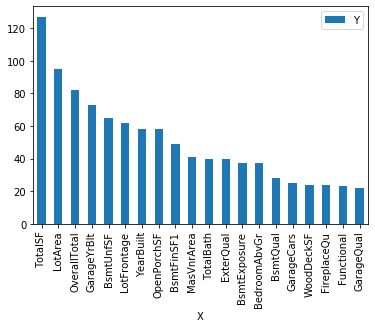

In [96]:
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y',ascending=False).head(20).plot.bar(x='X')

Let's see if our model will do better if we only include 100 of the best features decided by the XGBoost.

In [97]:
X_train_2 = X_train[fscores.sort_values(by='Y',ascending=False).head(100)['X']]
X_test_2 = X_test[fscores.sort_values(by='Y',ascending=False).head(100)['X']]

In [98]:
dtrain_2 = xgb.DMatrix(X_train_2, label=y_train)
dtest_2 = xgb.DMatrix(X_test_2)

In [99]:
# Train a new model with the best parameters from the search
model = xgb.train(params, dtrain_2, num_boost_round=250)

# Predict on testing and training set
y_test_pred = model.predict(dtest_2)
y_train_pred = model.predict(dtrain_2)

# Report training RMSE
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.09003804244569832
0.10441906171028521


There is not a significant difference, which means we succeded to train our model so it doesn't overfit even when there is a big number of features.

### Training dataset anaysis

Let's take a look at residuals plot. We plot the exponential values of y_train_pred and y_train, since we logaritmized them for modelling.   

Text(0, 0.5, 'Count')

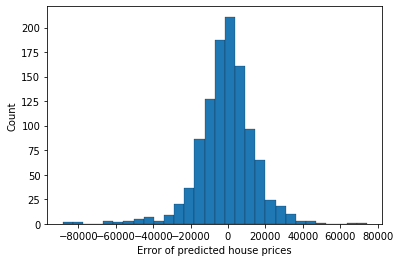

In [100]:
err_pred = np.exp(y_train_pred)-np.exp(y_train)
plt.hist(err_pred[np.abs(err_pred) < 100000], bins=30,edgecolor='black', linewidth=0.2 )
plt.xlabel('Error of predicted house prices')
plt.ylabel('Count')

We can see that residuals are normally distributed with mean 0. Therefore our predicted house prices for train dataset are on average correct. Now, let's consider houses for which absolute error exceeds 100000 USD.  

In [101]:
d = {'y_train': np.exp(y_train[err_pred < -100000]), 'y_train_pred': np.exp(y_train_pred[err_pred < -100000]), 
     'error': err_pred[err_pred < -100000]}
df = pd.DataFrame(data=d)
df

,y_train,y_train_pred,error
688,392001.0,258401.484375,-133599.515625
774,395001.0,291456.031250,-103544.968750
185,475001.0,374614.750000,-100386.250000
691,755001.0,581996.375000,-173004.625000


There are 4 houses for which the actual value is at least 100000 USD bigger than predicted.

In [102]:
d = {'y_train': np.exp(y_train[err_pred > 100000]), 'y_train_pred': np.exp(y_train_pred[err_pred > 100000]), 
     'error': err_pred[err_pred > 100000]}
df = pd.DataFrame(data=d)
df

,y_train,y_train_pred,error
1324,147001.0,264295.78125,117294.78125


There is 1 house for which predicted value would be at least 100000 USD bigger than the actual one. 

Finally, let's take a look at rmse of non-logaritmized values.

In [103]:
np.sqrt(mean_squared_error(np.exp(y_train_pred),np.exp(y_train)))

17557.379204673925

### Testing dataset analysis

Repeat the same analysis for the test dataset.

Text(0, 0.5, 'Count')

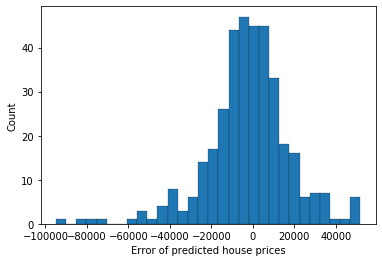

In [104]:
err_pred = np.exp(y_test_pred)-np.exp(y_test)
plt.hist(err_pred[np.abs(err_pred) < 100000], bins=30, edgecolor='black', linewidth=0.2 )
plt.xlabel('Error of predicted house prices')
plt.ylabel('Count')

Again we can see that residuals are normally distributed with mean 0. Therefore our predicted house prices for train dataset are on average correct. Now, let's consider houses for which absolute error exceeds 100000 USD.

In [105]:
d = {'y_test': np.exp(y_test[err_pred < -100000]), 'y_test_pred': np.exp(y_test_pred[err_pred < -100000]), 
     'error': err_pred[err_pred < -100000]}
df = pd.DataFrame(data=d)
df

,y_test,y_test_pred,error
1182,745001.0,462707.46875,-282293.53125


There is 1 house for which the actual value is at least 100000 USD bigger than predicted.

In [106]:
d = {'y_test': np.exp(y_test[err_pred > 100000]), 'y_test_pred': np.exp(y_test_pred[err_pred > 100000]), 
     'error': err_pred[err_pred > 100000]}
df = pd.DataFrame(data=d)
df

,y_test,y_test_pred,error


There are no houses for which predicted value would be at least 100000 USD bigger than the actual one. 

Finally, let's take a look at rmse of non-logaritmized values.

In [107]:
np.sqrt(mean_squared_error(np.exp(y_test_pred),np.exp(y_test)))

24858.54453104213

We can conclude that the difference between rmse of non-logaritmized values of training and testing dataset are small and therefore that the model is good.

For more of a visual representation we can also check plots bellow which show that in general original prices are well matched with predicted ones. (On y axis logaritimized sale prices are shown.)

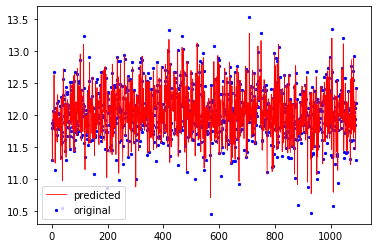

In [108]:
x_ax = range(len(y_train))
plt.scatter(x_ax, y_train, s=5, color="blue", label="original")
plt.plot(x_ax, y_train_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

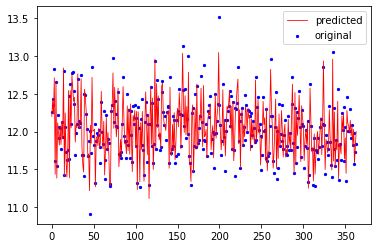

In [109]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_test_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Prediction on given test dataset

Finally, let's predict house sale prices of given test dataset, the one where we don't have information about the actual sale prices. 

In [110]:
# define new dtest
df_test = df_test[fscores.sort_values(by='Y',ascending=False).head(100)['X']]
dtest = xgb.DMatrix(df_test)

# Predict on new testing testing set
y_test_pred = model.predict(dtest)

# Return to non-logaritmized data
y_test_pred = np.exp(y_test_pred)

Text(0, 0.5, 'Count')

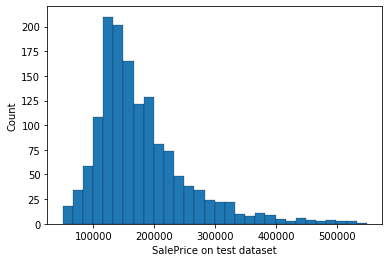

In [111]:
plt.hist(y_test_pred, bins=30, edgecolor='black', linewidth=0.2 )
plt.xlabel('SalePrice on test dataset')
plt.ylabel('Count')

In [112]:
# for submission
submission['SalePrice'] = y_test_pred
submission.to_csv(r'data/submission_xgboost.csv', index = False)